In [ ]:
# %pip install numpy matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread
import cv2
import caiman as cm 
import sciebo
from fake_data_gen import fake_data_1, fake_data_2

## CaImAn Movie Handling Tool

**Learning Outcome**
1. Load movies from CaImAn
2. Play movie
3. Resize and downsample movie

In [2]:
sciebo.download_file_from_sciebo('https://uni-bonn.sciebo.de/s/aLuGqYoZRFgwhzF', 'data', 'data_endoscope.tif')
sciebo.download_file_from_sciebo('https://uni-bonn.sciebo.de/s/RR7qj7tklW1rX25', 'data', 'Sue_2x_3000_40_-46.tif')

**Example** Load `data/data_endoscope.tif` using CaImAn and check its shape. How many frames does it have?

In [3]:
movie_1p = cm.load("data/data_endoscope.tif")
movie_1p.shape

(1000, 128, 128)

Load data/Sue_2x_3000_40_-46.tif using CaImAn and check its shape

In [4]:
movie_1p = cm.load("data/Sue_2x_3000_40_-46.tif")
movie_1p.shape

(3000, 170, 170)

**Example** Load and play `data/data_endoscope.tif` using CaImAn. Press `q` when you want to stop the movie to play

In [2]:
movie_1p = cm.load("data/data_endoscope.tif")
cm.play_movie(movie_1p)

Load and play `data/Sue_2x_3000_40_-46.tif` using CaImAn. Press `q` when you want to stop the movie to play

In [3]:
movie_1p = cm.load("data/Sue_2x_3000_40_-46.tif")
cm.play_movie(movie_1p)

It might be helpful to have frame numbers on screen.

Load and play `data/data_endoscope.tif` using CaImAn and display frame number. Press `q` when you want to stop the movie to play

Hint: use ``plot_text = True``

In [5]:
movie_1p = cm.load("data/data_endoscope.tif")
cm.play_movie(movie_1p, plot_text=True)

Load and play `data/Sue_2x_3000_40_-46.tif` using CaImAn and display frame number with frame rate of 10. Press `q` when you want to stop the movie to play

In [9]:
movie_1p = cm.load("data/Sue_2x_3000_40_-46.tif")
cm.play_movie(movie_1p[9:], plot_text=True, fr=10)

Sometimes, images can be quite noisy. We can downsample in time to remove some of the noise while playing.

**Example** Load and play `data/data_endoscope.tif` using CaImAn and display frame number. Downsample in time by a factor of 5

Press `q` when you want to stop the movie to play

In [10]:
downsample = 1. / 5
movie_1p = cm.load("data/data_endoscope.tif")
movie_1p_resize = movie_1p.copy()
movie_1p_resize.resize(fz = downsample).play(plot_text = True)

The difference in noise level is more significant in 2 photon sample before and after downsampling time.

Load and play `data/Sue_2x_3000_40_-46.tif` using CaImAn and display frame number. Downsample in time by a factor of 5

Press `q` when you want to stop the movie to play

In [12]:
downsample = 1/5
movie_1p = cm.load("data/Sue_2x_3000_40_-46.tif")
movie_1p_resize = movie_1p.copy()

movie_1p_resize=movie_1p_resize.resize(fz = downsample)
movie_1p.shape, movie_1p_resize.shape
movie_1p_resize.play(plot_text = True)

((3000, 170, 170), (600, 170, 170))

Load and play `data/Sue_2x_3000_40_-46.tif` using CaImAn and display frame number. Downsample in time by a factor of 100

Press `q` when you want to stop the movie to play

In [14]:
downsample = 1/100
movie_1p = cm.load("data/Sue_2x_3000_40_-46.tif")
movie_1p_resize = movie_1p.copy()
movie_1p_resize.resize(fz = downsample).play(plot_text = True)

That's a bit slow. Load and play `data/Sue_2x_3000_40_-46.tif` using CaImAn and display frame number. Downsample in time by a factor of 100 and with a frame rate of 10

Press `q` when you want to stop the movie to play

In [15]:
downsample = 1/100
movie_1p = cm.load("data/Sue_2x_3000_40_-46.tif")
movie_1p_resize = movie_1p.copy()
movie_1p_resize.resize(fz = downsample).play(plot_text = True, fr=10)

## Summary images

Summary images like correlation images, mean projections, and maximum intensity projections are used to guide preprocessing steps such as motion correction, where they can serve as reference images against which to align subsequent frames or to evaluate the effectiveness of the correction. They can highlight areas with unusually high or low activity, guiding further investigation into anomalies or specific phenomena of interest within the dataset.

In [16]:
# creating fake data for practice
fake_data_1 = fake_data_1()
fake_data_2 = fake_data_2()

**Example** Before we make summary images, let's first see how the raw data looks like. We will use some techniques we learnt yesterday.

Display first, second, and third frame of fake_data_1

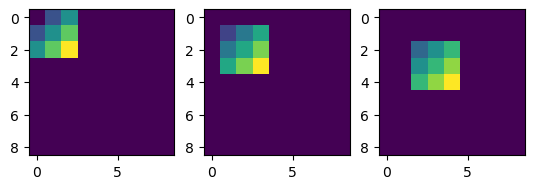

In [17]:
plt.subplot(131)
plt.imshow(fake_data_1[0])
plt.subplot(132)
plt.imshow(fake_data_1[1])
plt.subplot(133)
plt.imshow(fake_data_1[2])

Display first, sixth, and ninth frames of fake_data_2

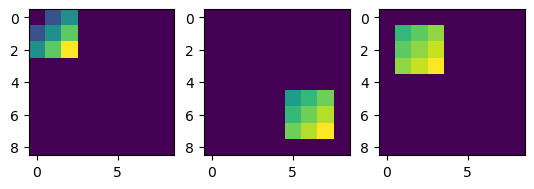

In [18]:
plt.subplot(131)
plt.imshow(fake_data_1[0])
plt.subplot(132)
plt.imshow(fake_data_1[5])
plt.subplot(133)
plt.imshow(fake_data_1[8])

Load `data/data_endoscope.tif` using caiman and display first three frames

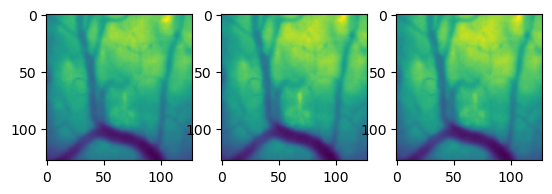

In [21]:
im = cm.load('data/data_endoscope.tif')
plt.subplot(131)
plt.imshow(im[0])
plt.subplot(132)
plt.imshow(im[1])
plt.subplot(133)
plt.imshow(im[2])

Load `data/Sue_2x_3000_40_-46.tif` using caiman and display first three frames

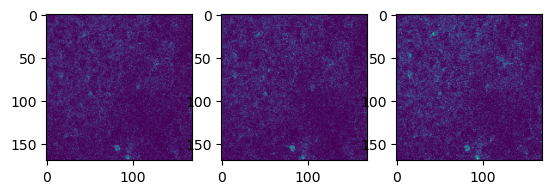

In [22]:
im = cm.load('data/Sue_2x_3000_40_-46.tif')
plt.subplot(131)
plt.imshow(im[0])
plt.subplot(132)
plt.imshow(im[1])
plt.subplot(133)
plt.imshow(im[2])

**Example** Make a maximum projection image of `fake_data_1`

(10, 9, 9)

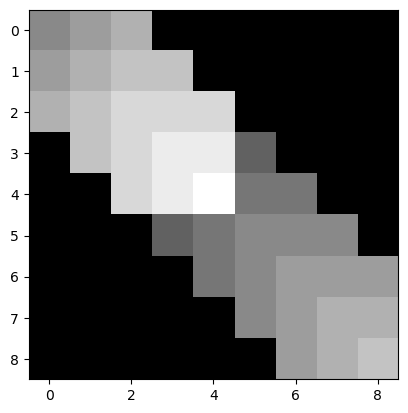

In [24]:
max_proj = np.max(fake_data_1, axis=0)
plt.imshow(max_proj, cmap='gray');
fake_data_1.shape

Make a maximum projection image of `fake_data_2`

(10, 100, 100)

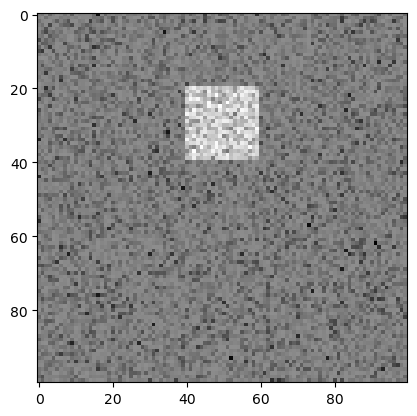

In [25]:
max_proj = np.max(fake_data_2, axis=0)
plt.imshow(max_proj, cmap='gray');
fake_data_2.shape

Make a maximum projection image of `movie_1p` and visualize with 'viridis'

(1000, 128, 128)

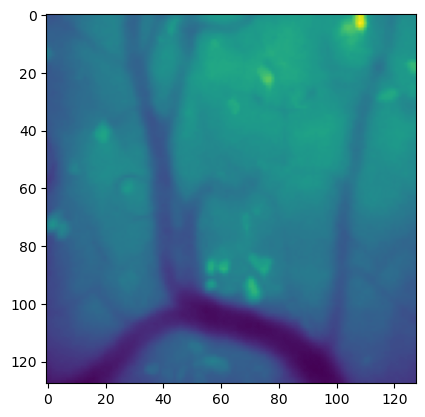

In [27]:
movie_1p = cm.load('data/data_endoscope.tif')
max_proj = np.max(movie_1p, axis=0)
plt.imshow(max_proj, cmap='viridis');
movie_1p.shape

Make a maximum projection image of `movie_2p`

(3000, 170, 170)

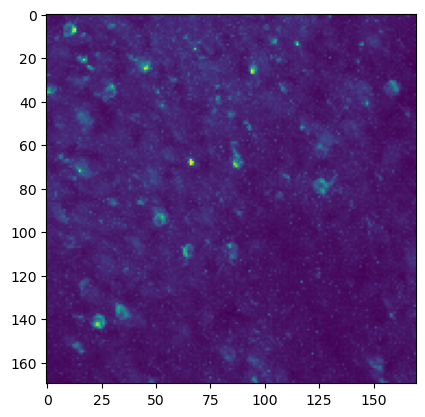

In [28]:
movie_2p = cm.load('data/Sue_2x_3000_40_-46.tif')
max_proj = np.max(movie_2p, axis=0)
plt.imshow(max_proj, cmap='viridis');
movie_2p.shape

The next summary image that is used as a template for motion correction is the mean of all frames. Let's get some practice taking mean or median of the frames

**Example** Make an average frame for `fake_data_2`

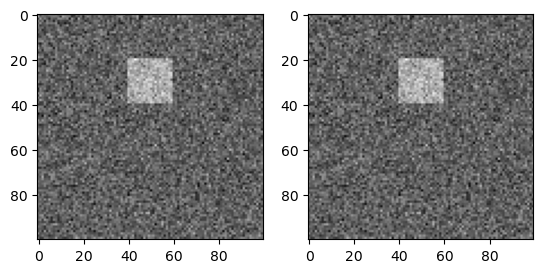

In [31]:
fig, ax = plt.subplots(1,2)
mean_proj = np.mean(fake_data_2, axis=0)
ax[0].imshow(mean_proj, cmap='gray');

mean_proj = np.mean(fake_data_2, axis=0)
ax[1].imshow(mean_proj, cmap='gray')

Plot mean and median of `fake_data_1` side by side

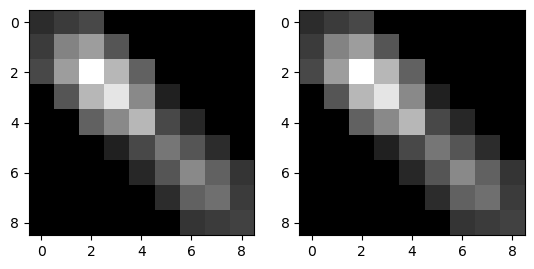

In [32]:
fig, ax = plt.subplots(1,2)
mean_proj = np.mean(fake_data_1, axis=0)
ax[0].imshow(mean_proj, cmap='gray');

mean_proj = np.mean(fake_data_1, axis=0)
ax[1].imshow(mean_proj, cmap='gray')

As you see in the image, mean and median of frames can have significant differences.

Plot mean and median of `movie_1p` side by side

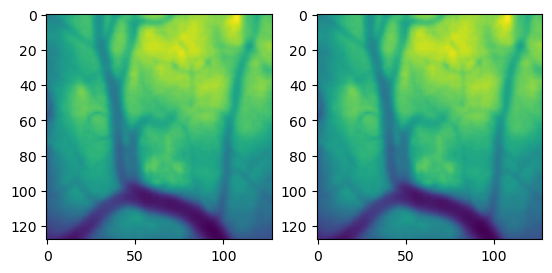

In [34]:
fig, ax = plt.subplots(1,2)
mean_proj = np.mean(movie_1p, axis=0)
ax[0].imshow(mean_proj, cmap='viridis')

mean_proj = np.mean(movie_1p, axis=0)
ax[1].imshow(mean_proj, cmap='viridis')

Thankfully, there is no significant differences between the two

Plot mean and median of `movie_2p` side by side

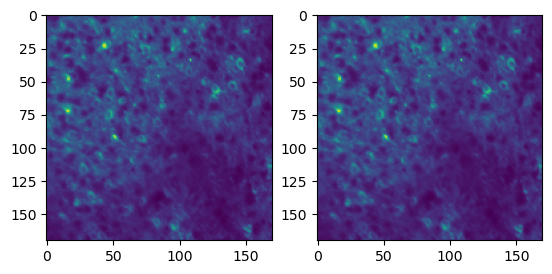

In [35]:
fig, ax = plt.subplots(1,2)
mean_proj = np.mean(movie_2p, axis=0)
ax[0].imshow(mean_proj, cmap='viridis')

mean_proj = np.mean(movie_2p, axis=0)
ax[1].imshow(mean_proj, cmap='viridis')

Again, there aren't significant differences between the two. As a result, either mean or median frame can be used for making some analysis.

Correlation image can be quite useful in visualizing how each pixel is correlated with its neighbours. If a bright pixel is bright due to neuronal activity, it is usually found to be highly correlated with the neighbouring pixels.

**Example** Correlation image is directly done with caiman. Let's try for `movie_1p`

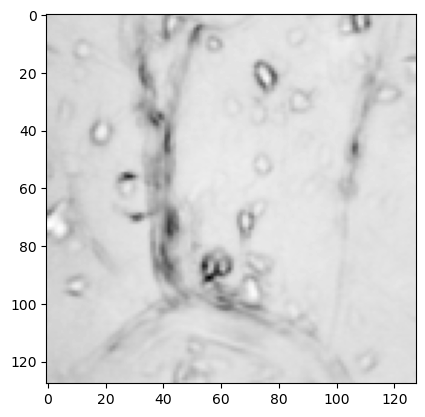

In [36]:
correlation_image = cm.local_correlations(movie_1p, swap_dim=False)
plt.imshow(correlation_image, cmap='gray')

Make a correlation image for `movie_2p`

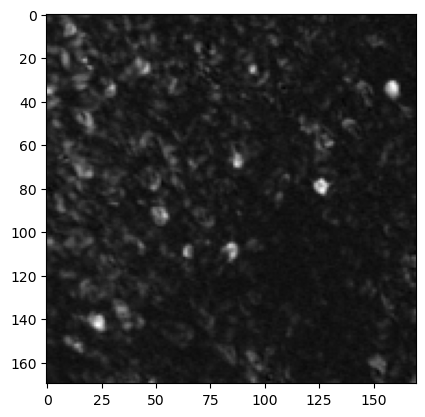

In [37]:
correlation_image = cm.local_correlations(movie_2p, swap_dim=False)
plt.imshow(correlation_image, cmap='gray')

If you don't assign `swap_dim` as False, you get weird images as it assumes that the time axis is the last dimension by default. In our case, it is the first dimension.

Check this with `movie_2p`

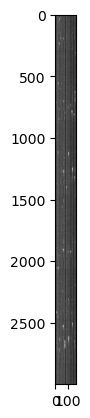

In [38]:
correlation_image = cm.local_correlations(movie_2p, swap_dim=True)
plt.imshow(correlation_image, cmap='gray')

## Spatial filtering

We will have to employ high pass spatial filtering for motion correction and source extraction for 1-photon imaging to remove background activity which is usually low-frequency activity. Here, let's practice doing high pass and low pass filtering. 

Low pass filters allow low-frequency components of an image to pass through while attenuating (reducing the amplitude of) high-frequency components. Low-frequency components correspond to the smooth, slowly varying parts of the image, such as broad areas of similar intensity, whereas high-frequency components correspond to the rapid changes in intensity, such as edges or noise.

Caiman uses a gaussian filter to perform spatial filtering. Let's see how the image changes when we apply low pass and high pass filters to our images. Gausial filter/kernel specified by npix by npix (for example, (9,9) means a filter size of 9 pixels by 9 pixels). Varying the size of the kernel impacts the standard deviation of the gaussian function used and hence impacts the smoothness of the resulting image.

**Example** Make a low-pass spatial filter with a 9x9 gaussian filter for mean frame of `fake_data_1`

```python
cv2.GaussianBlur(
    image, # image for gaussian blurring
    (3, 3), # (kernel size in x, y)
    0 # (calculate standard deviation from kernel size)
)
```

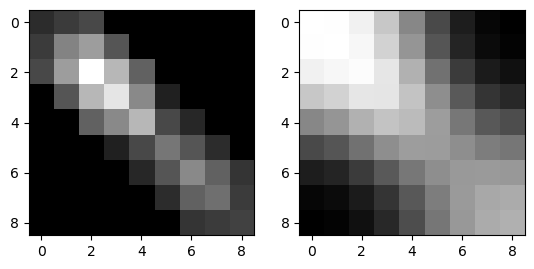

In [39]:
low_pass = cv2.GaussianBlur(np.mean(fake_data_1, axis=0), (9, 9), 0)

plt.subplot(1,2,1)
plt.imshow(np.mean(fake_data_1, axis=0), cmap='gray')

plt.subplot(1,2,2)
plt.imshow(low_pass, cmap='gray')

Make a low-pass spatial filter with a 3x3 gaussian filter for mean frame of `fake_data_1`

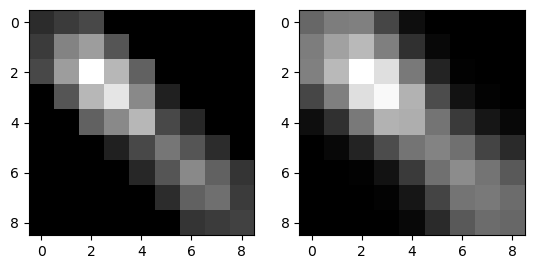

In [40]:
low_pass = cv2.GaussianBlur(np.mean(fake_data_1, axis=0), (3,3), 0)

plt.subplot(1,2,1)
plt.imshow(np.mean(fake_data_1, axis=0), cmap='gray')

plt.subplot(1,2,2)
plt.imshow(low_pass, cmap='gray')

We can make drastic change and see how this affects the image. Make a low-pass spatial filter with a 31x31 gaussian filter for max frame of `fake_data_1`

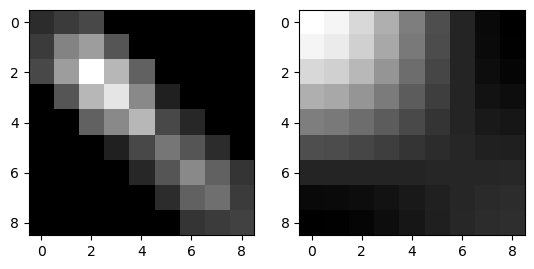

In [41]:
low_pass = cv2.GaussianBlur(np.max(fake_data_1, axis=0), (31,31), 0)

plt.subplot(1,2,1)
plt.imshow(np.mean(fake_data_1, axis=0), cmap='gray')

plt.subplot(1,2,2)
plt.imshow(low_pass, cmap='gray')

We can create a completely smoothe version of image by using a very large kernel. Make a low-pass spatial filter with a 59x59 gaussian filter for mean frame of `fake_data_2`

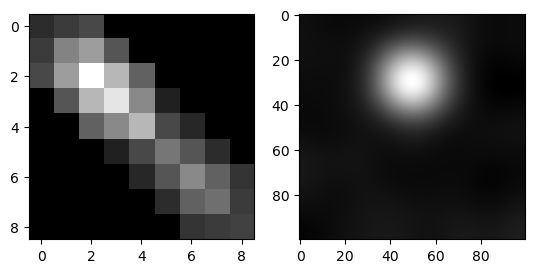

In [42]:
low_pass = cv2.GaussianBlur(np.mean(fake_data_2, axis=0), (59, 59), 0)

plt.subplot(1,2,1)
plt.imshow(np.mean(fake_data_1, axis=0), cmap='gray')

plt.subplot(1,2,2)
plt.imshow(low_pass, cmap='gray')

High pass filters do the opposite of low pass filters; they allow high-frequency components to pass through while attenuating low-frequency components. This emphasizes edges, fine details, and textures in the image, which are associated with rapid changes in intensity.

**Example** Make a high-pass spatial filter with a 9x9 gaussian filter for mean frame of `fake_data_1`

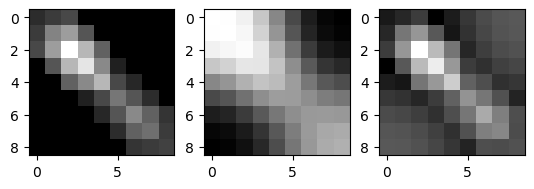

In [43]:
low_pass = cv2.GaussianBlur(np.mean(fake_data_1, axis=0), (9, 9), 0)
high_pass = cv2.subtract(np.mean(fake_data_1, axis=0), low_pass)

plt.subplot(1,3,1)
plt.imshow(np.mean(fake_data_1, axis=0), cmap='gray')

plt.subplot(1,3,2)
plt.imshow(low_pass, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(high_pass, cmap='gray')

Make a high-pass spatial filter with a 31x31 gaussian filter for mean frame of `fake_data_1`

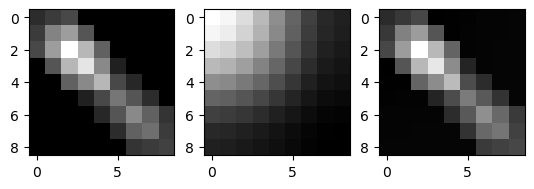

In [44]:
low_pass = cv2.GaussianBlur(np.mean(fake_data_1, axis=0), (31,31), 0)
high_pass = cv2.subtract(np.mean(fake_data_1, axis=0), low_pass)

plt.subplot(1,3,1)
plt.imshow(np.mean(fake_data_1, axis=0), cmap='gray')

plt.subplot(1,3,2)
plt.imshow(low_pass, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(high_pass, cmap='gray')

Make a high-pass spatial filter with a 109x109 gaussian filter for mean frame of `fake_data_2`

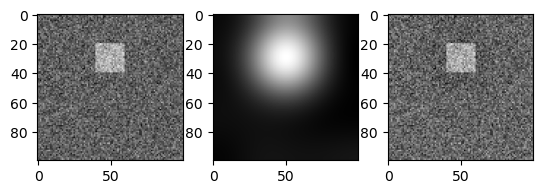

In [46]:
low_pass = cv2.GaussianBlur(np.mean(fake_data_2, axis=0), (109, 109), 0)
high_pass = cv2.subtract(np.mean(fake_data_2, axis=0), low_pass)

plt.subplot(1,3,1)
plt.imshow(np.mean(fake_data_2, axis=0), cmap='gray')

plt.subplot(1,3,2)
plt.imshow(low_pass, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(high_pass, cmap='gray')

Make a high-pass spatial filter with a 29x29 gaussian filter for max frame of `movie_1p`

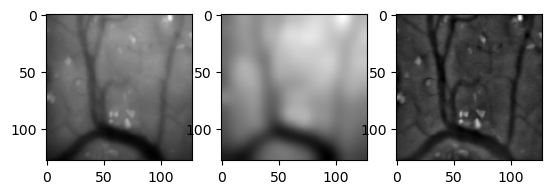

In [47]:
low_pass = cv2.GaussianBlur(np.max(movie_1p, axis=0), (29, 29), 0)
high_pass = cv2.subtract(np.max(movie_1p, axis=0), low_pass)

plt.subplot(1,3,1)
plt.imshow(np.max(movie_1p, axis=0), cmap='gray')

plt.subplot(1,3,2)
plt.imshow(low_pass, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(high_pass, cmap='gray')

Make a high-pass spatial filter with a 9x9 gaussian filter for max frame of `movie_2p`

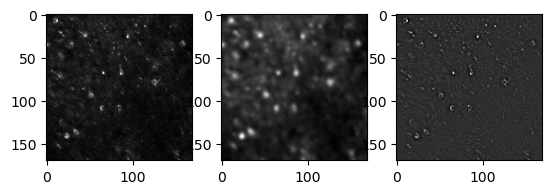

In [48]:
low_pass = cv2.GaussianBlur(np.max(movie_2p, axis=0), (9, 9), 0)
high_pass = cv2.subtract(np.max(movie_2p, axis=0), low_pass)

plt.subplot(1,3,1)
plt.imshow(np.max(movie_2p, axis=0), cmap='gray')

plt.subplot(1,3,2)
plt.imshow(low_pass, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(high_pass, cmap='gray')